# Harmonic-Percussive Source Separation (HPSS)

/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(1025, 284)


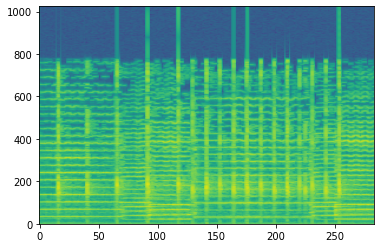

In [1]:
%load_ext autoreload
%autoreload 2
import librosa
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import pandas as pd
from scipy import signal
from spectrogramtools import *
from collections import OrderedDict

y, sr = librosa.load("violincastanets.mp3", sr=22050)
win_length = 2048
hop_length = 512

S = STFT(y, win_length, hop_length, useLibrosa=False)
SAbs = np.abs(S)

print(S.shape)
plt.imshow(np.log10(SAbs/1e-3), aspect='auto')
plt.gca().invert_yaxis()
#librosa.display.specshow(librosa.amplitude_to_db(np.abs(S), ref=np.max), y_axis='log', x_axis='time')

In [2]:
ipd.Audio(y, rate=sr)

In [3]:
winh = 5
SH = signal.medfilt(SAbs, [1, 2*winh+1])
winv = 40
SP = signal.medfilt(SAbs, [2*winv+1, 1])

## Slow Version
"""
SFilt = np.zeros_like(SAbs)
for i in range(S.shape[0]):
    for j in range(S.shape[1]):
        # Take out horizontal slice that starts to the left and ends to the right of [i, j]
        s = SAbs[i, j-w:j+w+1]
        SFilt[i, j] = np.median(s)
"""

'\nSFilt = np.zeros_like(SAbs)\nfor i in range(S.shape[0]):\n    for j in range(S.shape[1]):\n        # Take out horizontal slice that starts to the left and ends to the right of [i, j]\n        s = SAbs[i, j-w:j+w+1]\n        SFilt[i, j] = np.median(s)\n'

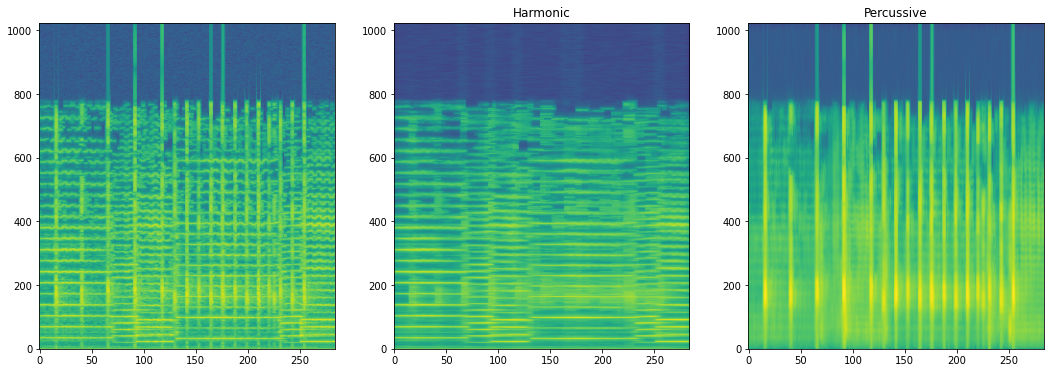

In [4]:
plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.imshow(np.log10(SAbs/1e-3), aspect='auto')
plt.gca().invert_yaxis()
plt.subplot(132)
plt.imshow(np.log10(SH/1e-3), aspect='auto')
plt.title("Harmonic")
plt.gca().invert_yaxis()
plt.subplot(133)
plt.imshow(np.log10(SP/1e-3), aspect='auto')
plt.title("Percussive")
plt.gca().invert_yaxis()

In [5]:
y_harm = griffinLimInverse(SH, win_length, hop_length)
ipd.Audio(y_harm, rate=sr)

Iteration 1 of 10
Iteration 2 of 10
Iteration 3 of 10
Iteration 4 of 10
Iteration 5 of 10
Iteration 6 of 10
Iteration 7 of 10
Iteration 8 of 10
Iteration 9 of 10
Iteration 10 of 10


In [6]:
y_perc = griffinLimInverse(SP, win_length, hop_length)
ipd.Audio(y_perc, rate=sr)

Iteration 1 of 10
Iteration 2 of 10
Iteration 3 of 10
Iteration 4 of 10
Iteration 5 of 10
Iteration 6 of 10
Iteration 7 of 10
Iteration 8 of 10
Iteration 9 of 10
Iteration 10 of 10


### Soft Mask (Wiener Filter)


In [7]:
SFilt = S*(SH/(SH + SP))
y_filt = iSTFT(SFilt, win_length, hop_length)
ipd.Audio(y_filt, rate=sr)

In [8]:
SFilt = S*(SP/(SH + SP))
y_filt = iSTFT(SFilt, win_length, hop_length)
ipd.Audio(y_filt, rate=sr)

# Matrix Decomposition of Spectrograms

In [9]:
from NMF import *
y, sr = librosa.load("doves.wav", sr=22050)
win_length = 2048*4
hop_length = 512

S = STFT(y, win_length, hop_length)
SAbs = np.abs(S)

Time elapsed H initializing: 1.5e-05


/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


NMF iteration 1 of 100
VLam Elapsed Time: 0.0138
Elapsed Time H Update 0.00143
NMF iteration 2 of 100
VLam Elapsed Time: 0.0146
Elapsed Time H Update 0.00113
NMF iteration 3 of 100
VLam Elapsed Time: 0.0241
Elapsed Time H Update 0.0124
NMF iteration 4 of 100
VLam Elapsed Time: 0.0144
Elapsed Time H Update 0.000987
NMF iteration 5 of 100
VLam Elapsed Time: 0.0262
Elapsed Time H Update 0.00102
NMF iteration 6 of 100
VLam Elapsed Time: 0.0144
Elapsed Time H Update 0.0012
NMF iteration 7 of 100
VLam Elapsed Time: 0.0185
Elapsed Time H Update 0.00111
NMF iteration 8 of 100
VLam Elapsed Time: 0.0145
Elapsed Time H Update 0.000982
NMF iteration 9 of 100
VLam Elapsed Time: 0.0177
Elapsed Time H Update 0.00197
NMF iteration 10 of 100
VLam Elapsed Time: 0.0167
Elapsed Time H Update 0.00236


/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


NMF iteration 11 of 100
VLam Elapsed Time: 0.0145
Elapsed Time H Update 0.00164
NMF iteration 12 of 100
VLam Elapsed Time: 0.0146
Elapsed Time H Update 0.00127
NMF iteration 13 of 100
VLam Elapsed Time: 0.0153
Elapsed Time H Update 0.0118
NMF iteration 14 of 100
VLam Elapsed Time: 0.0189
Elapsed Time H Update 0.00267
NMF iteration 15 of 100
VLam Elapsed Time: 0.0166
Elapsed Time H Update 0.00766
NMF iteration 16 of 100
VLam Elapsed Time: 0.0155
Elapsed Time H Update 0.00145
NMF iteration 17 of 100
VLam Elapsed Time: 0.0258
Elapsed Time H Update 0.0035
NMF iteration 18 of 100
VLam Elapsed Time: 0.0143
Elapsed Time H Update 0.0493
NMF iteration 19 of 100
VLam Elapsed Time: 0.0113
Elapsed Time H Update 0.00269
NMF iteration 20 of 100
VLam Elapsed Time: 0.0113
Elapsed Time H Update 0.00287


/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


NMF iteration 21 of 100
VLam Elapsed Time: 0.0147
Elapsed Time H Update 0.00159
NMF iteration 22 of 100
VLam Elapsed Time: 0.0164
Elapsed Time H Update 0.0139
NMF iteration 23 of 100
VLam Elapsed Time: 0.0157
Elapsed Time H Update 0.00407
NMF iteration 24 of 100
VLam Elapsed Time: 0.0159
Elapsed Time H Update 0.00348
NMF iteration 25 of 100
VLam Elapsed Time: 0.0159
Elapsed Time H Update 0.0015
NMF iteration 26 of 100
VLam Elapsed Time: 0.0155
Elapsed Time H Update 0.00139
NMF iteration 27 of 100
VLam Elapsed Time: 0.0153
Elapsed Time H Update 0.00144
NMF iteration 28 of 100
VLam Elapsed Time: 0.0171
Elapsed Time H Update 0.00867
NMF iteration 29 of 100
VLam Elapsed Time: 0.0176
Elapsed Time H Update 0.00324
NMF iteration 30 of 100
VLam Elapsed Time: 0.0152
Elapsed Time H Update 0.00146


/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


NMF iteration 31 of 100
VLam Elapsed Time: 0.0141
Elapsed Time H Update 0.00189
NMF iteration 32 of 100
VLam Elapsed Time: 0.0152
Elapsed Time H Update 0.00133
NMF iteration 33 of 100
VLam Elapsed Time: 0.0151
Elapsed Time H Update 0.0242
NMF iteration 34 of 100
VLam Elapsed Time: 0.0147
Elapsed Time H Update 0.00106
NMF iteration 35 of 100
VLam Elapsed Time: 0.0146
Elapsed Time H Update 0.00105
NMF iteration 36 of 100
VLam Elapsed Time: 0.0148
Elapsed Time H Update 0.00728
NMF iteration 37 of 100
VLam Elapsed Time: 0.0151
Elapsed Time H Update 0.00334
NMF iteration 38 of 100
VLam Elapsed Time: 0.0191
Elapsed Time H Update 0.00105
NMF iteration 39 of 100
VLam Elapsed Time: 0.015
Elapsed Time H Update 0.00106
NMF iteration 40 of 100
VLam Elapsed Time: 0.0146
Elapsed Time H Update 0.00259


/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


NMF iteration 41 of 100
VLam Elapsed Time: 0.0139
Elapsed Time H Update 0.00141
NMF iteration 42 of 100
VLam Elapsed Time: 0.0143
Elapsed Time H Update 0.00265
NMF iteration 43 of 100
VLam Elapsed Time: 0.0172
Elapsed Time H Update 0.00516
NMF iteration 44 of 100
VLam Elapsed Time: 0.0143
Elapsed Time H Update 0.00118
NMF iteration 45 of 100
VLam Elapsed Time: 0.0145
Elapsed Time H Update 0.00112
NMF iteration 46 of 100
VLam Elapsed Time: 0.0148
Elapsed Time H Update 0.00211
NMF iteration 47 of 100
VLam Elapsed Time: 0.0151
Elapsed Time H Update 0.00098
NMF iteration 48 of 100
VLam Elapsed Time: 0.0146
Elapsed Time H Update 0.00111
NMF iteration 49 of 100
VLam Elapsed Time: 0.0228
Elapsed Time H Update 0.00472
NMF iteration 50 of 100
VLam Elapsed Time: 0.014
Elapsed Time H Update 0.00106


/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


NMF iteration 51 of 100
VLam Elapsed Time: 0.0151
Elapsed Time H Update 0.00123
NMF iteration 52 of 100
VLam Elapsed Time: 0.0142
Elapsed Time H Update 0.00126
NMF iteration 53 of 100
VLam Elapsed Time: 0.0175
Elapsed Time H Update 0.00125
NMF iteration 54 of 100
VLam Elapsed Time: 0.0318
Elapsed Time H Update 0.000985
NMF iteration 55 of 100
VLam Elapsed Time: 0.0142
Elapsed Time H Update 0.00114
NMF iteration 56 of 100
VLam Elapsed Time: 0.0142
Elapsed Time H Update 0.000966
NMF iteration 57 of 100
VLam Elapsed Time: 0.0146
Elapsed Time H Update 0.00106
NMF iteration 58 of 100
VLam Elapsed Time: 0.0146
Elapsed Time H Update 0.00102
NMF iteration 59 of 100
VLam Elapsed Time: 0.015
Elapsed Time H Update 0.00124
NMF iteration 60 of 100
VLam Elapsed Time: 0.017
Elapsed Time H Update 0.00125


/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


NMF iteration 61 of 100
VLam Elapsed Time: 0.014
Elapsed Time H Update 0.00237
NMF iteration 62 of 100
VLam Elapsed Time: 0.0155
Elapsed Time H Update 0.0018
NMF iteration 63 of 100
VLam Elapsed Time: 0.015
Elapsed Time H Update 0.00215
NMF iteration 64 of 100
VLam Elapsed Time: 0.0161
Elapsed Time H Update 0.00375
NMF iteration 65 of 100
VLam Elapsed Time: 0.016
Elapsed Time H Update 0.00342
NMF iteration 66 of 100
VLam Elapsed Time: 0.0165
Elapsed Time H Update 0.0102
NMF iteration 67 of 100
VLam Elapsed Time: 0.0148
Elapsed Time H Update 0.001
NMF iteration 68 of 100
VLam Elapsed Time: 0.0146
Elapsed Time H Update 0.000971
NMF iteration 69 of 100
VLam Elapsed Time: 0.0138
Elapsed Time H Update 0.00113
NMF iteration 70 of 100
VLam Elapsed Time: 0.0147
Elapsed Time H Update 0.00106


/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


NMF iteration 71 of 100
VLam Elapsed Time: 0.0139
Elapsed Time H Update 0.00155
NMF iteration 72 of 100
VLam Elapsed Time: 0.0183
Elapsed Time H Update 0.00121
NMF iteration 73 of 100
VLam Elapsed Time: 0.0177
Elapsed Time H Update 0.00128
NMF iteration 74 of 100
VLam Elapsed Time: 0.0146
Elapsed Time H Update 0.000988
NMF iteration 75 of 100
VLam Elapsed Time: 0.0177
Elapsed Time H Update 0.0012
NMF iteration 76 of 100
VLam Elapsed Time: 0.0151
Elapsed Time H Update 0.00105
NMF iteration 77 of 100
VLam Elapsed Time: 0.0144
Elapsed Time H Update 0.00129
NMF iteration 78 of 100
VLam Elapsed Time: 0.026
Elapsed Time H Update 0.00709
NMF iteration 79 of 100
VLam Elapsed Time: 0.0144
Elapsed Time H Update 0.00118
NMF iteration 80 of 100
VLam Elapsed Time: 0.0146
Elapsed Time H Update 0.00123


/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


NMF iteration 81 of 100
VLam Elapsed Time: 0.0138
Elapsed Time H Update 0.00147
NMF iteration 82 of 100
VLam Elapsed Time: 0.0144
Elapsed Time H Update 0.00575
NMF iteration 83 of 100
VLam Elapsed Time: 0.0139
Elapsed Time H Update 0.00114
NMF iteration 84 of 100
VLam Elapsed Time: 0.0177
Elapsed Time H Update 0.0011
NMF iteration 85 of 100
VLam Elapsed Time: 0.0186
Elapsed Time H Update 0.00126
NMF iteration 86 of 100
VLam Elapsed Time: 0.0143
Elapsed Time H Update 0.00129
NMF iteration 87 of 100
VLam Elapsed Time: 0.0146
Elapsed Time H Update 0.00136
NMF iteration 88 of 100
VLam Elapsed Time: 0.0143
Elapsed Time H Update 0.00105
NMF iteration 89 of 100
VLam Elapsed Time: 0.0147
Elapsed Time H Update 0.00111
NMF iteration 90 of 100
VLam Elapsed Time: 0.0142
Elapsed Time H Update 0.000996


/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


NMF iteration 91 of 100
VLam Elapsed Time: 0.0139
Elapsed Time H Update 0.00123
NMF iteration 92 of 100
VLam Elapsed Time: 0.0151
Elapsed Time H Update 0.00125
NMF iteration 93 of 100
VLam Elapsed Time: 0.0151
Elapsed Time H Update 0.00349
NMF iteration 94 of 100
VLam Elapsed Time: 0.0145
Elapsed Time H Update 0.0011
NMF iteration 95 of 100
VLam Elapsed Time: 0.0163
Elapsed Time H Update 0.00108
NMF iteration 96 of 100
VLam Elapsed Time: 0.0147
Elapsed Time H Update 0.00118
NMF iteration 97 of 100
VLam Elapsed Time: 0.0147
Elapsed Time H Update 0.00112
NMF iteration 98 of 100
VLam Elapsed Time: 0.0149
Elapsed Time H Update 0.0012
NMF iteration 99 of 100
VLam Elapsed Time: 0.015
Elapsed Time H Update 0.0011
NMF iteration 100 of 100
VLam Elapsed Time: 0.015
Elapsed Time H Update 0.00107


/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


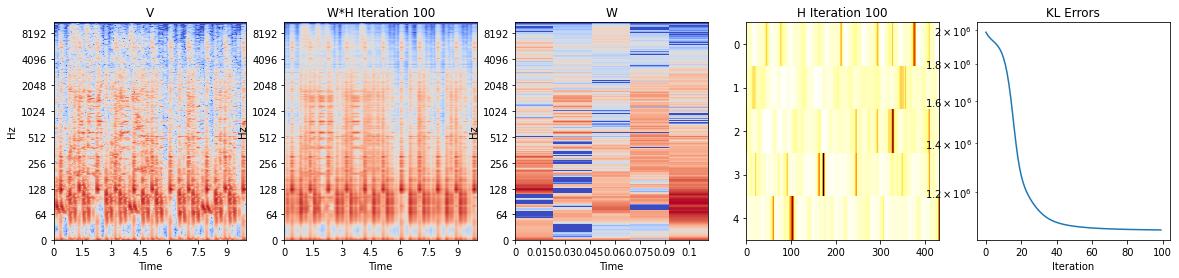

In [10]:
W, H = doNMF(SAbs, 5, 100, plotfn=lambda V, W, H, iters, errs: plotNMFSpectra(V, W, H, iters, errs, hop_length))

In [11]:
def make_html_audio(ys, sr, width=100):
    clips = []
    for y in ys:
        audio = ipd.Audio(y, rate=sr)
        audio_html = audio._repr_html_().replace('\n', '').strip()
        audio_html = audio_html.replace('<audio ', '<audio style="width: {}px; "'.format(width))
        clips.append(audio_html)
    return clips

In [17]:
ws = []
ys = []
WH = W.dot(H)
K = H.shape[0]
for i in range(K):
    Hi = np.zeros_like(H)
    Hi[i, :] = H[i, :]
    WHi = np.dot(W, Hi)
    Wi = W[:, i]
    Wi = np.reshape(Wi, (Wi.size, 1))
    Wi = Wi*np.ones((1, int(win_length/hop_length)))
    wi = griffinLimInverse(Wi, win_length, hop_length)
    ws.append(wi)
    Si = S*WHi/WH
    yi = iSTFT(Si, win_length, hop_length)
    ys.append(yi)
ys = make_html_audio(ys, sr, width=200)
ws = make_html_audio(ws, sr, width=100)
pd.set_option('display.max_colwidth', None) 
df = pd.DataFrame(OrderedDict([("Components", ws), ("Filtered", ys)]))
ipd.HTML(df.to_html(escape=False, float_format='%.2f'))

Iteration 1 of 10
Iteration 2 of 10
Iteration 3 of 10
Iteration 4 of 10
Iteration 5 of 10
Iteration 6 of 10
Iteration 7 of 10
Iteration 8 of 10
Iteration 9 of 10
Iteration 10 of 10
Iteration 1 of 10
Iteration 2 of 10


/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=8192 is too small for input signal of length=7680
  n_fft, y.shape[-1]


Iteration 3 of 10
Iteration 4 of 10
Iteration 5 of 10
Iteration 6 of 10
Iteration 7 of 10
Iteration 8 of 10
Iteration 9 of 10
Iteration 10 of 10
Iteration 1 of 10
Iteration 2 of 10
Iteration 3 of 10
Iteration 4 of 10
Iteration 5 of 10
Iteration 6 of 10
Iteration 7 of 10
Iteration 8 of 10
Iteration 9 of 10
Iteration 10 of 10
Iteration 1 of 10
Iteration 2 of 10
Iteration 3 of 10
Iteration 4 of 10
Iteration 5 of 10
Iteration 6 of 10
Iteration 7 of 10
Iteration 8 of 10
Iteration 9 of 10
Iteration 10 of 10
Iteration 1 of 10
Iteration 2 of 10
Iteration 3 of 10
Iteration 4 of 10
Iteration 5 of 10
Iteration 6 of 10
Iteration 7 of 10
Iteration 8 of 10
Iteration 9 of 10
Iteration 10 of 10
